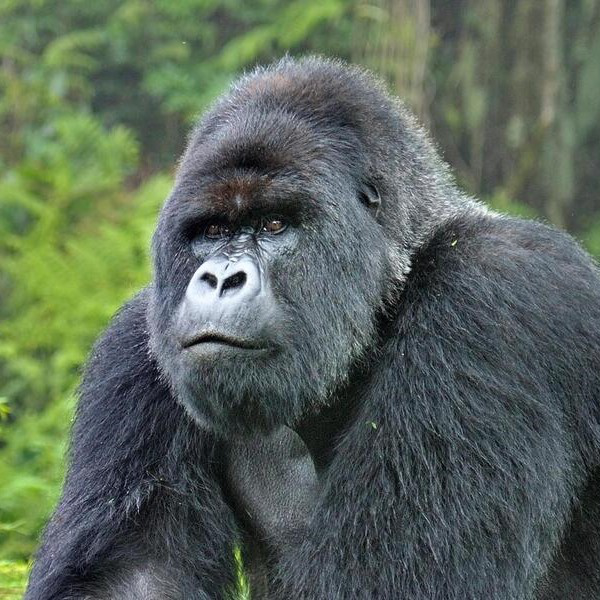

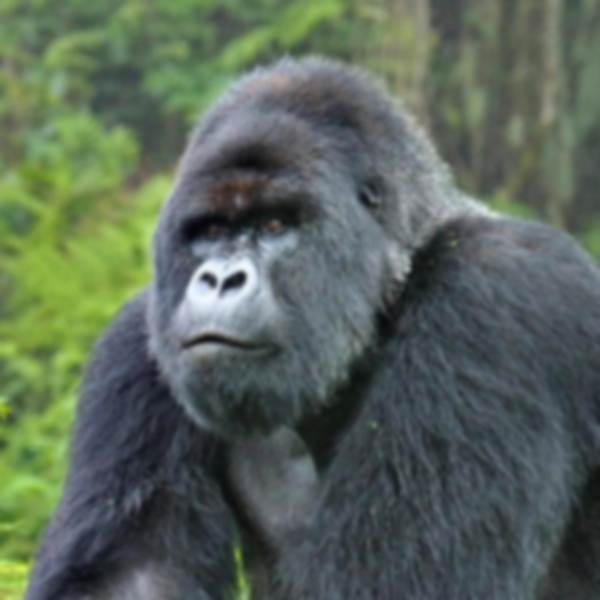

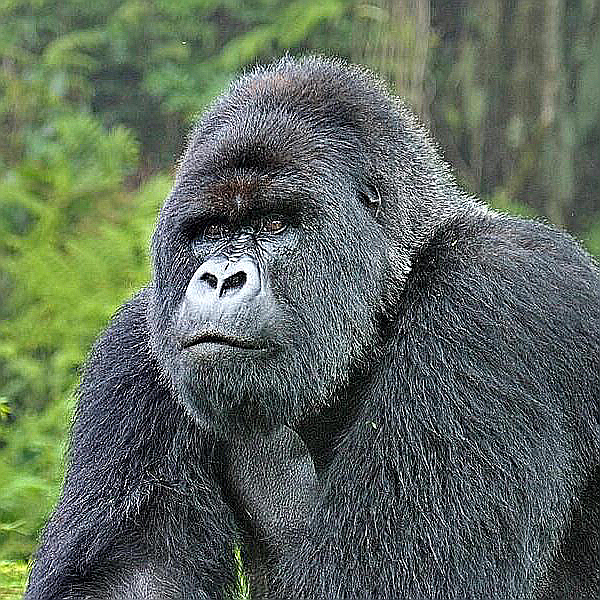

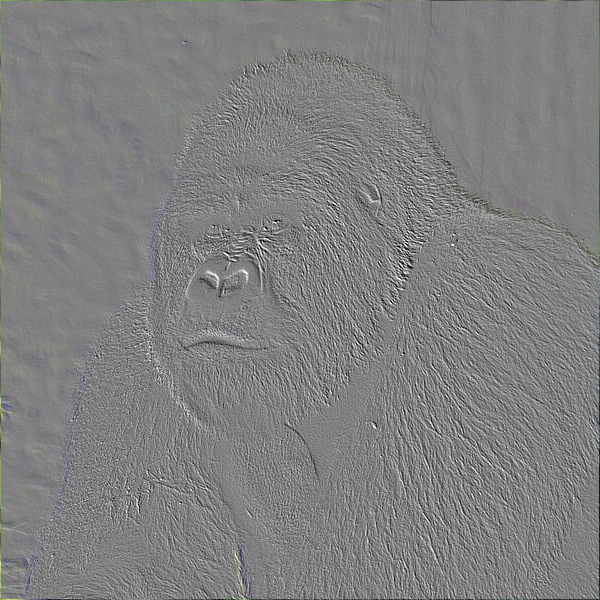

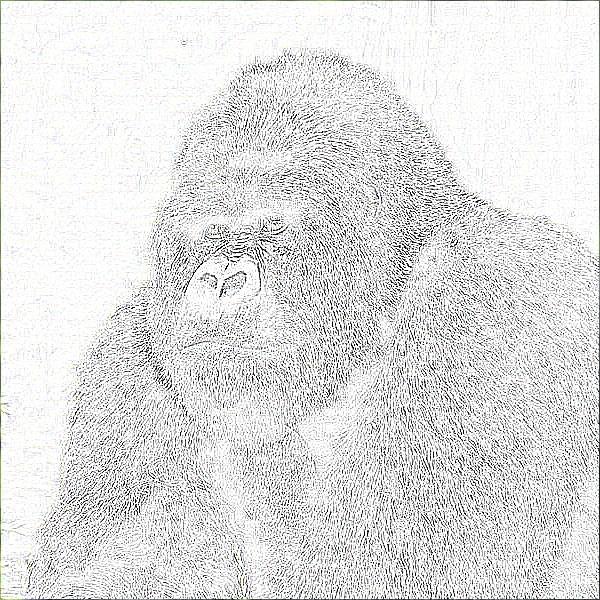

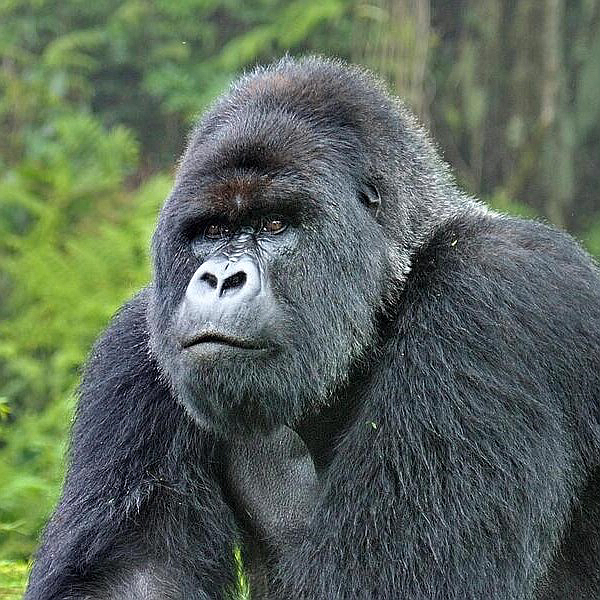

In [1]:
#4 zad

from PIL import Image, ImageFilter

#A

# Open the image
img = Image.open('gorilla.jpg')

# Display the original image
img.show()

# Applying different filters
# 1. Gaussian Blur
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=2))
blurred_img.show()

# 2. Edge Enhancement
edge_enhanced_img = img.filter(ImageFilter.EDGE_ENHANCE)
edge_enhanced_img.show()

# 3. Emboss
emboss_img = img.filter(ImageFilter.EMBOSS)
emboss_img.show()

# 4. Contour
contour_img = img.filter(ImageFilter.CONTOUR)
contour_img.show()

# 5. Sharpen
sharpened_img = img.filter(ImageFilter.SHARPEN)
sharpened_img.show()

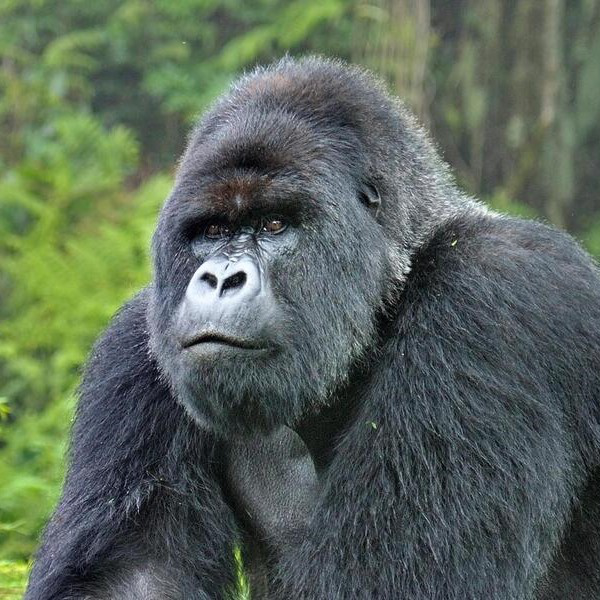

[[[116 132  91]
  [151 180 101]
  [152 182 102]
  ...
  [ 92 101  88]
  [ 90  99  87]
  [107 122  90]]

 [[115 132 100]
  [144 175 111]
  [144 175 110]
  ...
  [105 114  98]
  [102 111  95]
  [112 127  98]]

 [[114 130  98]
  [144 175 111]
  [145 176 111]
  ...
  [104 113  97]
  [100 109  93]
  [111 126  97]]

 ...

 [[106 120  79]
  [175 195  83]
  [174 193  80]
  ...
  [ 56  64  64]
  [ 64  74  73]
  [ 99 112  81]]

 [[105 120  77]
  [167 190  74]
  [168 191  75]
  ...
  [ 48  55  55]
  [ 54  64  63]
  [ 91 105  72]]

 [[ 93 110  76]
  [160 187  83]
  [160 187  83]
  ...
  [ 66  74  69]
  [ 65  75  70]
  [ 94 109  78]]]


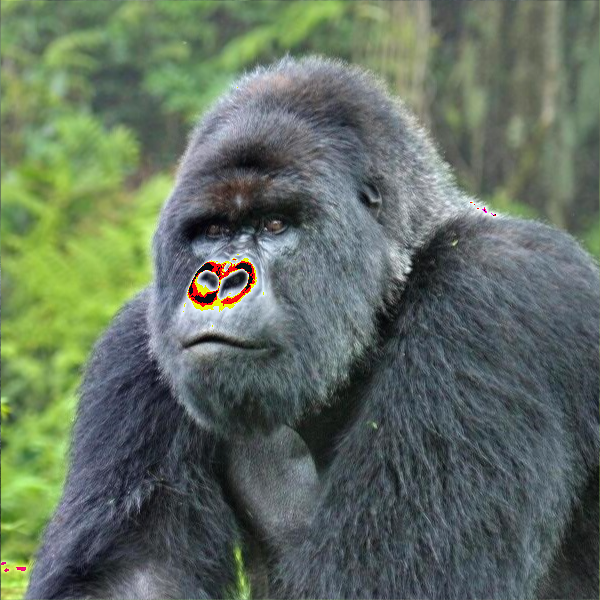

In [38]:
#B
from scipy import ndimage
import numpy as np
import os, sys

def ConvolveShowAndSave(loadFilePath, saveFilePath, filters, filtersShape, isMonochromatic=False):
    if filtersShape % 2 == 0 :
        raise Exception("ArithmeticError") 
    img = Image.open(loadFilePath)
    imgArray = np.array(img)    
    img.show()
    if isMonochromatic == False:
        imgRed = imgArray[:,:,0]
        imgGreen = imgArray[:,:,1]
        imgBlue = imgArray[:,:,2]

        for filter in filters:
            imgRed = ndimage.convolve(imgRed, filter, mode="wrap")
            imgGreen = ndimage.convolve(imgGreen, filter, mode="wrap")
            imgBlue = ndimage.convolve(imgBlue, filter, mode="wrap")
        imgArray[:,:,0] = imgRed
        imgArray[:,:,1] = imgGreen
        imgArray[:,:,2] = imgBlue
    else:
        for filter in filters:
            imgArray = ndimage.convolve(imgArray, filter, mode="constant")
    print(imgArray)
    resultImage = Image.fromarray(imgArray)
    resultImage.show()
    resultImage.save(saveFilePath)

filterA = np.array([
    [0.1,0.1,0.1],
    [0.1,-0.1,0.5],
    [0.1,0.1,0.1]
])
filters = np.array([
    filterA
])
ConvolveShowAndSave("gorilla.jpg", "gorillaConvolved.jpg", filters, 3)
